In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie danych
data = load_breast_cancer()
y = data.target
X = data.data


Liczba wszystkich przypadków: 569
Liczba przypadków raka złośliwego: 357


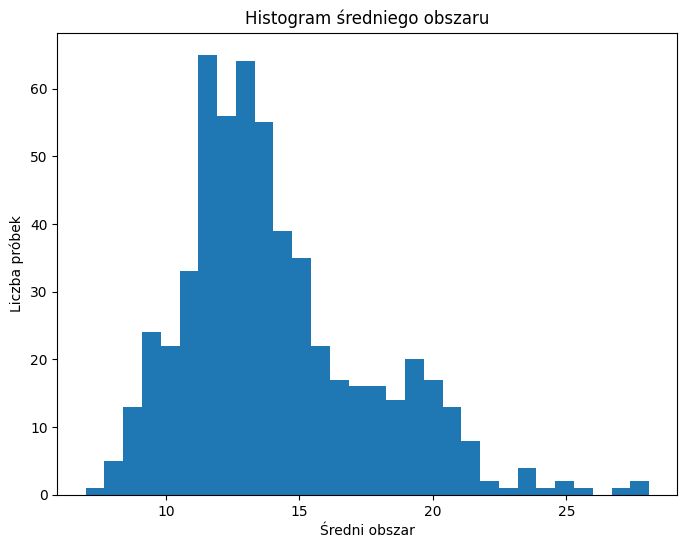

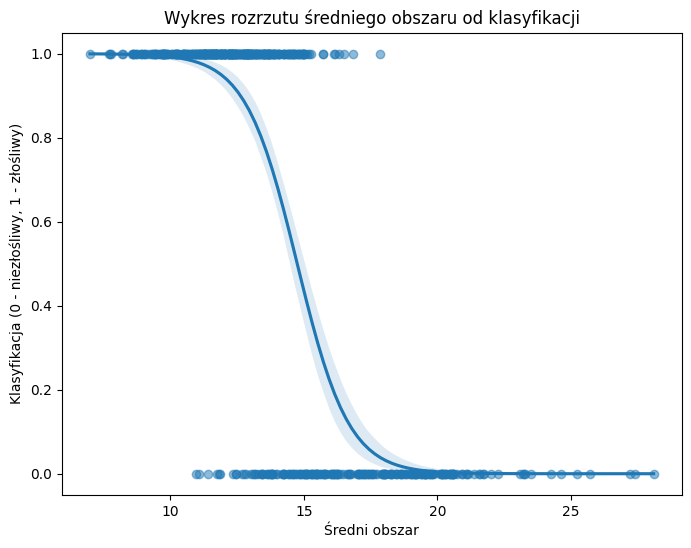

In [5]:
# 1. Sprawdź liczbę wszystkich przypadków
print(f"Liczba wszystkich przypadków: {len(y)}")

# 2. Sprawdź liczbę przypadków raka złośliwego
malignant_count = np.sum(y == 1)
print(f"Liczba przypadków raka złośliwego: {malignant_count}")

# 3. Narysuj histogram średniego obszaru (mean area)
mean_area = X[:, 0]
plt.figure(figsize=(8, 6))
plt.hist(mean_area, bins=30)
plt.xlabel("Średni obszar")
plt.ylabel("Liczba próbek")
plt.title("Histogram średniego obszaru")
plt.show()

# 4. Narysuj wykres rozrzutu (scatterplot) średniego obszaru od klasyfikacji
plt.figure(figsize=(8, 6))
sns.regplot(x=mean_area, y=y, logistic=True, scatter_kws={'alpha': 0.5})
plt.xlabel("Średni obszar")
plt.ylabel("Klasyfikacja (0 - niezłośliwy, 1 - złośliwy)")
plt.title("Wykres rozrzutu średniego obszaru od klasyfikacji")
plt.show()